# Oman RTA (Road Traffic Accidents) Analysis in R


***
## 1. Data Extraction

In [217]:
# @author: Aamir M. Khan
# Created First: April 2 2019
# Updated Last:

### Import Libraries

In [218]:
install.packages("reshape")
install.packages("ggplot2")

Installing package into 'C:/Users/Aamir/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'reshape' is in use and will not be installed"Installing package into 'C:/Users/Aamir/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'colorspace', 'utf8', 'labeling', 'munsell', 'RColorBrewer', 'fansi', 'pillar', 'pkgconfig', 'gtable', 'lazyeval', 'scales', 'tibble', 'viridisLite'




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.1.0  3.1.1             FALSE

package 'colorspace' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\User

installing the source package 'ggplot2'



In [219]:
library("reshape")
library("ggplot2")

### Load Data Files

In [220]:
accidents <- read.csv("data/accidents_monthly.csv")
head(accidents,5)

Year,January,February,March,April,May,June,July,August,September,October,November,December
2000,1122,984,1241,1047,1185,1087,1205,1076,1096,1046,987,964
2001,1114,999,1055,1010,1081,1028,1014,1043,1160,1283,1203,1111
2002,1251,1125,1097,696,695,635,552,662,535,587,646,626
2003,754,941,996,950,1026,845,838,767,711,827,758,784
2004,876,729,735,816,846,793,804,891,743,805,688,735


In [221]:
injuries <- read.csv("data/injuries_month.csv")
head(injuries,5)

Year,January,February,March,April,May,June,July,August,September,October,November,December
2000,883,755,852,737,794,657,849,777,717,768,691,843
2001,868,689,856,716,767,819,827,774,761,857,869,822
2002,985,855,740,563,609,641,468,686,494,696,588,629
2003,604,642,527,546,567,509,608,654,444,603,551,480
2004,560,571,477,523,537,514,567,744,503,614,563,463


In [222]:
dim(accidents); dim(injuries)

[1] 19 13

[1] 19 13

### Cleaning the Data

**accidents table**

In [223]:
accidents = melt(accidents,id='Year',variable.name='Month',value.name='Values')
head(accidents,5)

Year,Month,Values
2000,January,1122
2001,January,1114
2002,January,1251
2003,January,754
2004,January,876


In [224]:
accidents$Month = as.integer(factor(accidents$Month, levels = unique(accidents$Month)))

In [225]:
accidents = na.omit(accidents)

In [226]:
accidents$Time <- as.Date(sprintf("%d-%02d-%02d", accidents$Year, accidents$Month,1))

In [227]:
accidents <- accidents[c('Time','Values')]

In [228]:
accidents <- accidents[order(accidents$Time),]

In [229]:
rownames(accidents) <- NULL

In [230]:
head(accidents,5)

Time,Values
2000-01-01,1122
2000-02-01,984
2000-03-01,1241
2000-04-01,1047
2000-05-01,1185


**injuries table**

In [231]:
injuries = melt(injuries,id='Year',variable.name='Month',value.name='Values')
head(injuries,5)

Year,Month,Values
2000,January,883
2001,January,868
2002,January,985
2003,January,604
2004,January,560


In [232]:
injuries$Month = as.integer(factor(injuries$Month, levels = unique(injuries$Month)))

In [233]:
injuries = na.omit(injuries)

In [234]:
injuries$Time <- as.Date(sprintf("%d-%02d-%02d", injuries$Year, injuries$Month,1))

In [235]:
injuries <- injuries[c('Time','Values')]

In [236]:
injuries <- injuries[order(injuries$Time),]

In [237]:
rownames(injuries) <- NULL

In [238]:
head(injuries,5)

Time,Values
2000-01-01,883
2000-02-01,755
2000-03-01,852
2000-04-01,737
2000-05-01,794


### Merge two tables

### Exploratory Data Analysis

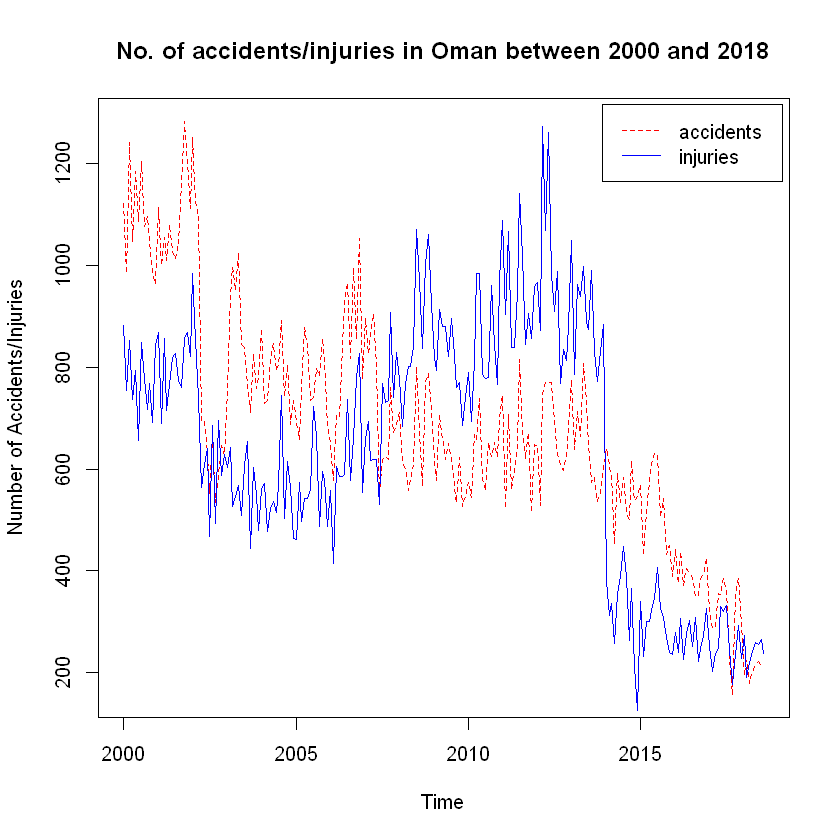

In [246]:
plot(accidents$Time, accidents$Values, type='l', col='red', 
     xlab='Time', ylab='Number of Accidents/Injuries', lty=2)
title('No. of accidents/injuries in Oman between 2000 and 2018')
lines(injuries$Time, injuries$Values, type='l', col='blue', lty=1)
legend("topright", inset=.01, legend=c("accidents","injuries"), col=c("red","blue"),lty=c(2,1), ncol=1)

**Visual for the years 2012-2014**

In [247]:
temp1 <- accidents[accidents$Time>='2012-01-01' & accidents$Time<'2015-01-01',]
temp2 <- injuries[injuries$Time>='2012-01-01' & injuries$Time<'2015-01-01',]

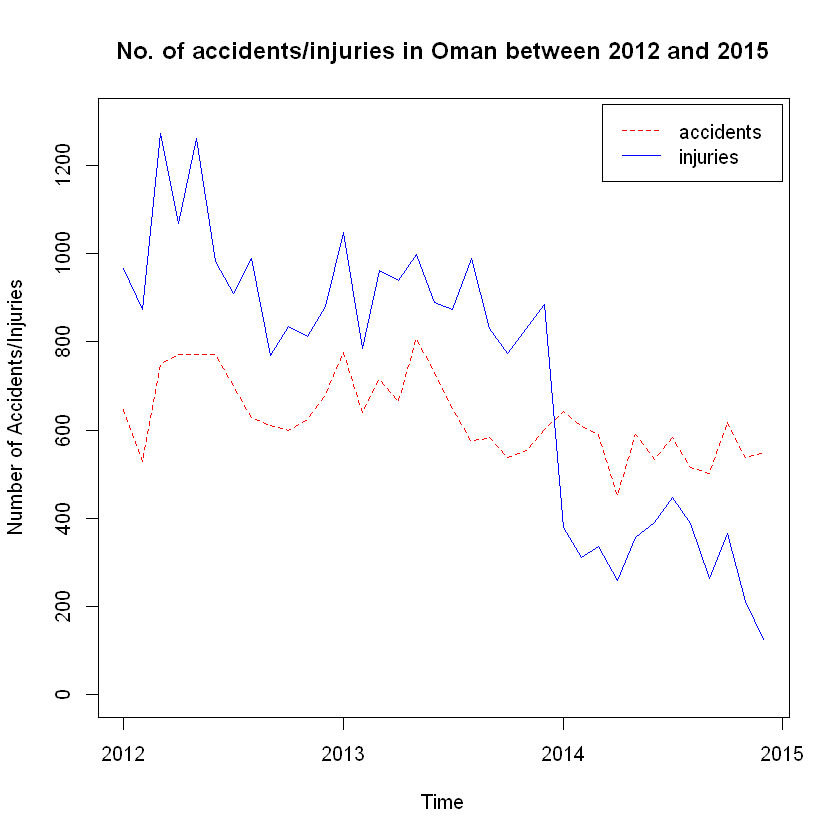

In [248]:
plot(temp1$Time, temp1$Values, type='l', col='red', ylim = c(0,1300),
     xlab='Time', ylab='Number of Accidents/Injuries', lty=2)
title('No. of accidents/injuries in Oman between 2012 and 2015')
lines(temp2$Time, temp2$Values, type='l', col='blue', lty=1)
legend("topright", inset=.01, legend=c("accidents","injuries"), col=c("red","blue"),lty=c(2,1), ncol=1)

### Datatype integrity check

### Feature engineering

### Split Training/Validation/Test Sets

***
## MACHINE LEARNING
## 2. Train the Model

### MODEL 1

### MODEL 2

### MODEL 3

***
## 3. Predict New Data

### Clean data

### Make predictions 

***
***
# Rough Work 